In [34]:
import numpy as np
from bandits import MultiArmedBandit

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick

# from multiprocessing import Pool

In [35]:

# font = {'family' : 'normal',
#         # 'weight' : 'bold',
#         'size'   : 22}
# matplotlib.rc('font', **font)

mpl.rcParams['font.size'] = 5
mpl.rcParams['figure.dpi'] = 300

In [36]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
mab = MultiArmedBandit(k = 10)

time_horizon = 2000
number_of_experiments = 200

greedy = mab.average_behavior(N = number_of_experiments, T = time_horizon, epsilon = 0)
metrics2 = mab.average_behavior(N = number_of_experiments, T = time_horizon, epsilon = 0.01)
metrics1 = mab.average_behavior(N = number_of_experiments, T = time_horizon, epsilon = 0.1)
ucb = mab.average_behavior(N = number_of_experiments, T = time_horizon, strategy = 'UCB')

In [37]:
ucb = mab.average_behavior(N = number_of_experiments, T = time_horizon, strategy = 'UCB')

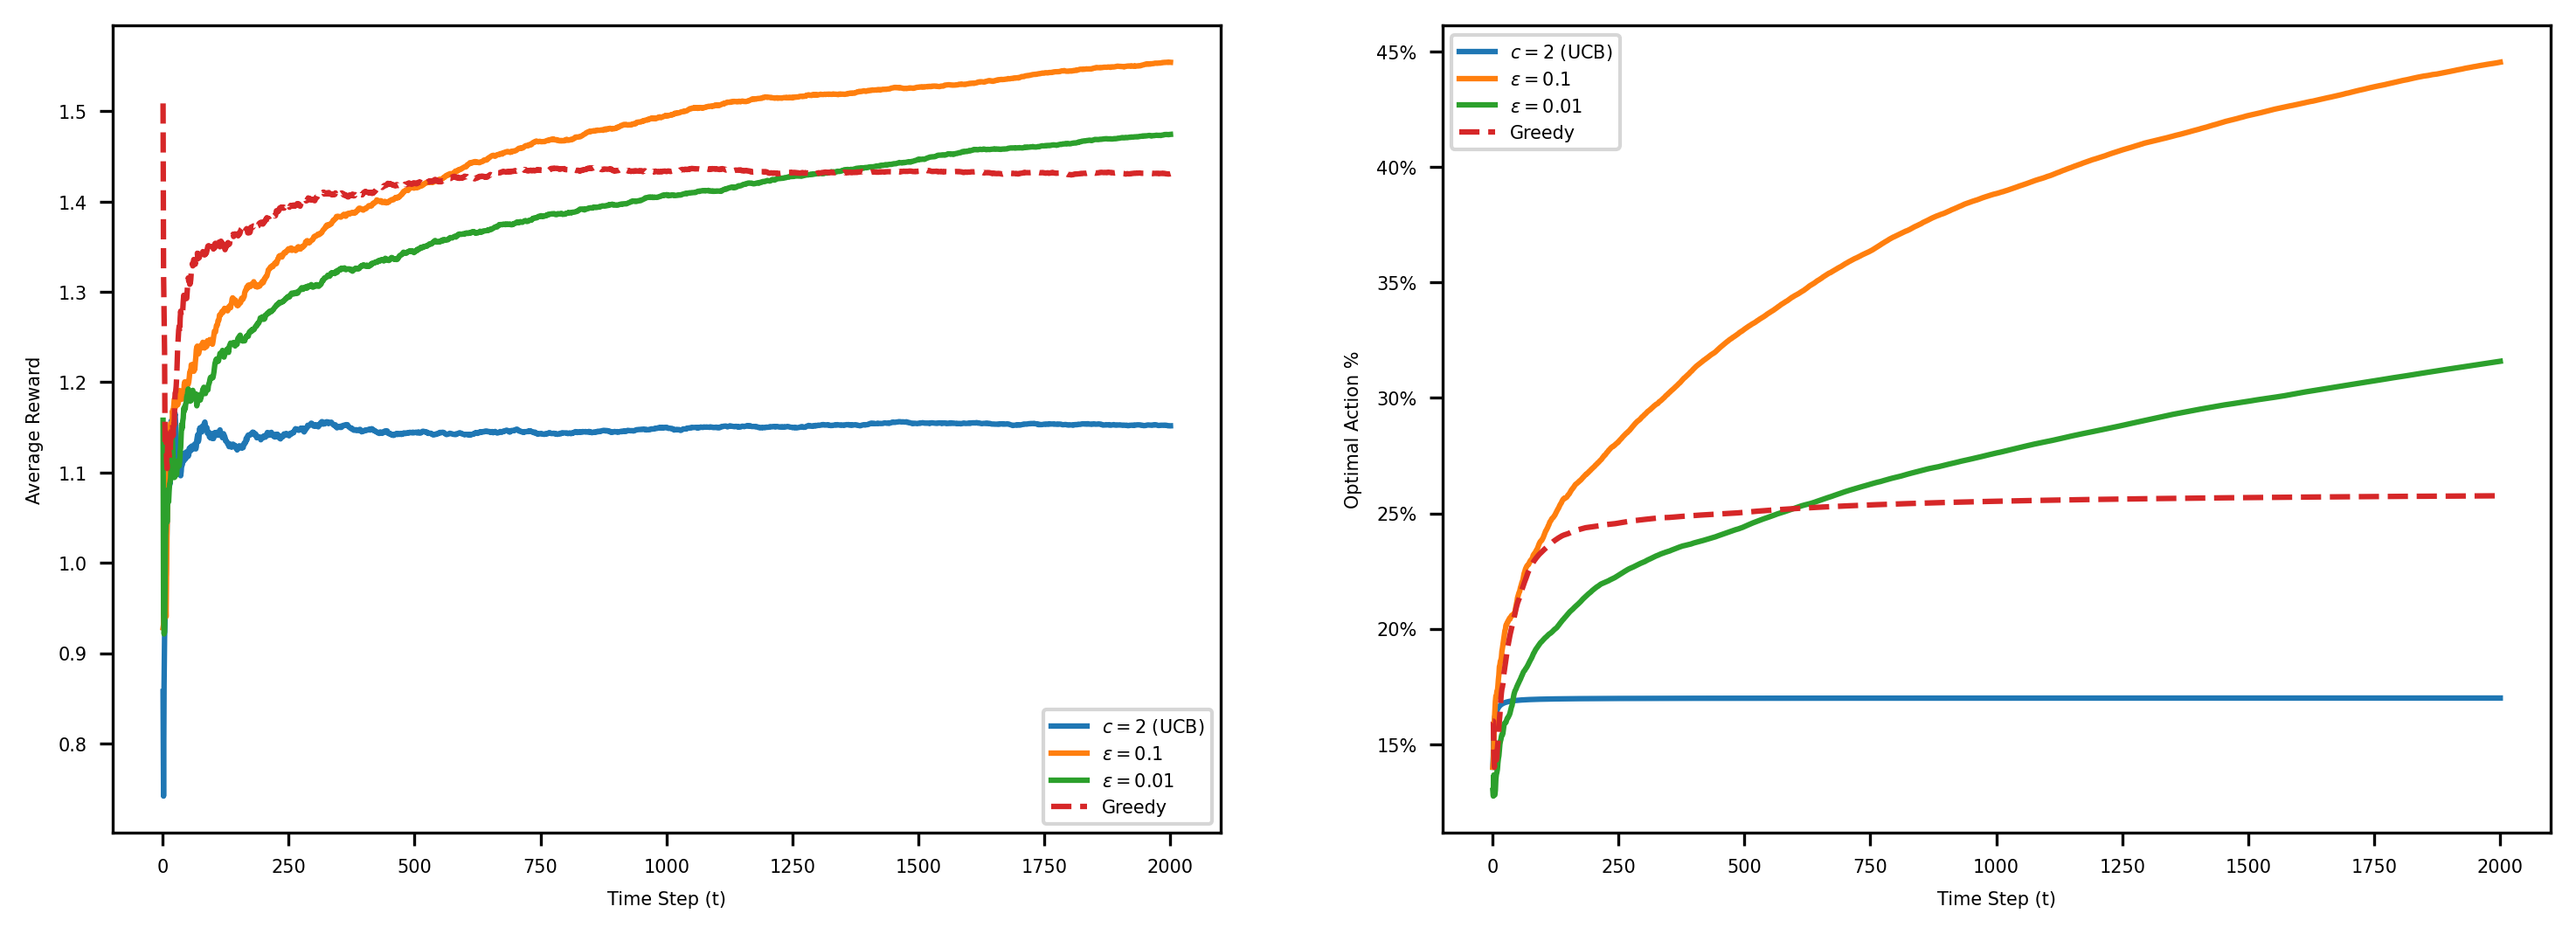

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(12,4))

ax1.plot(range(1,time_horizon+1), ucb['average_reward'], label='$c=2$ (UCB)')
ax1.plot(range(1,time_horizon+1), metrics1['average_reward'], label='$\epsilon=0.1$')
ax1.plot(range(1,time_horizon+1), metrics2['average_reward'], label='$\epsilon=0.01$')
ax1.plot(range(1,time_horizon+1), greedy['average_reward'], linestyle = '--', label='Greedy')
ax1.set_ylabel('Average Reward')
ax1.set_xlabel('Time Step (t)')

ax2.plot(range(1,time_horizon+1), ucb['optimal_action'], label='$c=2$ (UCB)')
ax2.plot(range(1,time_horizon+1), metrics1['optimal_action'], label='$\epsilon=0.1$')
ax2.plot(range(1,time_horizon+1), metrics2['optimal_action'], label='$\epsilon=0.01$')
ax2.plot(range(1,time_horizon+1), greedy['optimal_action'], linestyle = '--', label='Greedy')
ax2.set_ylabel('Optimal Action %')
ax2.set_xlabel('Time Step (t)')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))

ax1.legend()
ax2.legend()
plt.show()

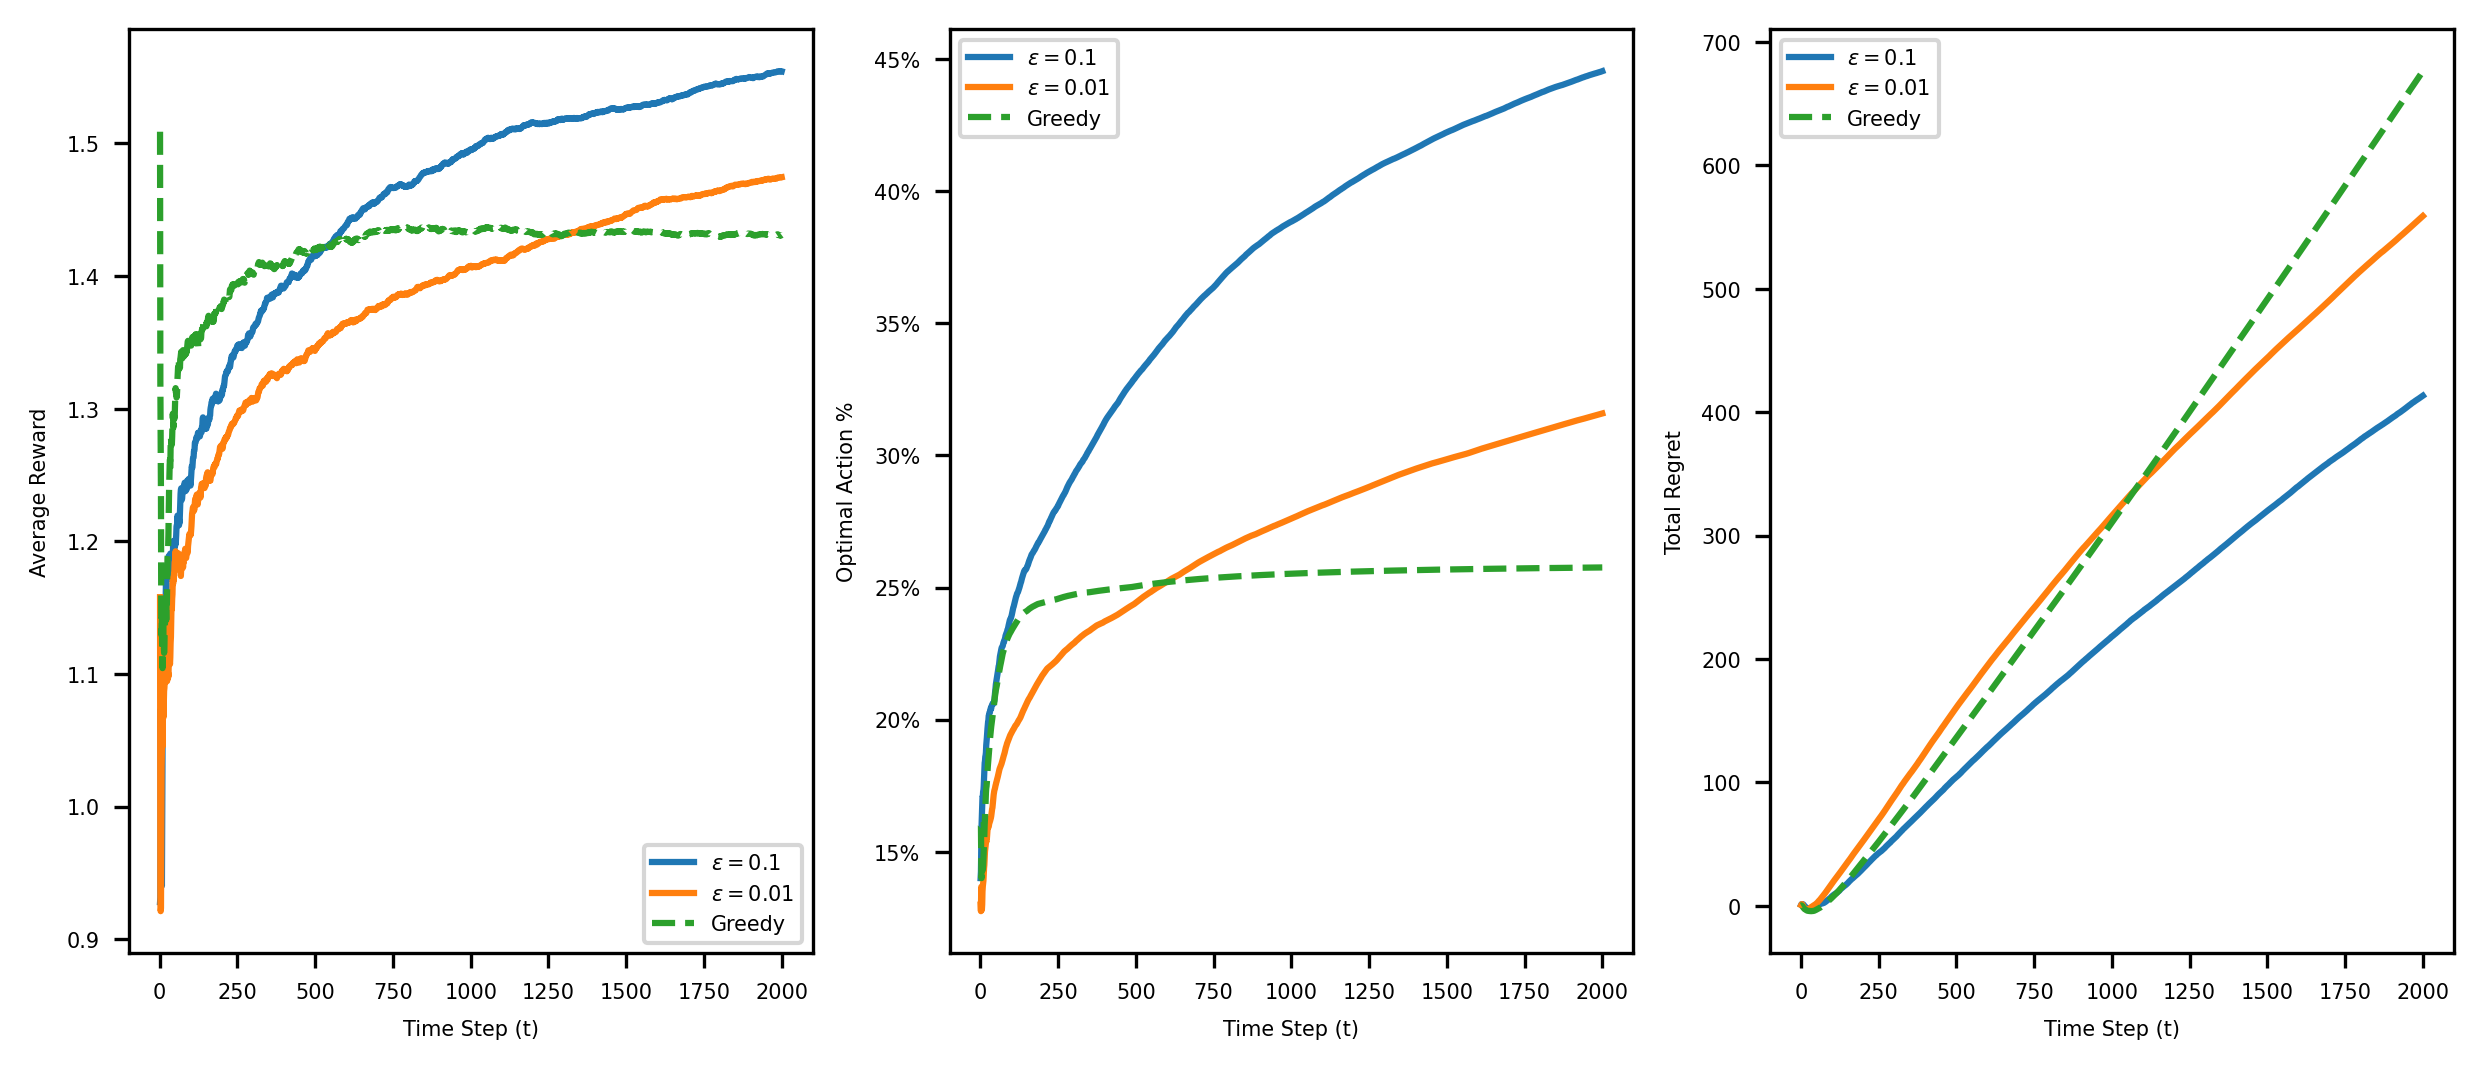

In [42]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=False, figsize=(10,4))

# ax1.plot(range(1,time_horizon+1), ucb['average_reward'], label='$c=2$ (UCB)')
ax1.plot(range(1,time_horizon+1), metrics1['average_reward'], label='$\epsilon=0.1$')
ax1.plot(range(1,time_horizon+1), metrics2['average_reward'], label='$\epsilon=0.01$')
ax1.plot(range(1,time_horizon+1), greedy['average_reward'], linestyle = '--', label='Greedy')
ax1.set_ylabel('Average Reward')
ax1.set_xlabel('Time Step (t)')

# ax2.plot(range(1,time_horizon+1), ucb['optimal_action'], label='$c=2$ (UCB)')
ax2.plot(range(1,time_horizon+1), metrics1['optimal_action'], label='$\epsilon=0.1$')
ax2.plot(range(1,time_horizon+1), metrics2['optimal_action'], label='$\epsilon=0.01$')
ax2.plot(range(1,time_horizon+1), greedy['optimal_action'], linestyle = '--', label='Greedy')
ax2.set_ylabel('Optimal Action %')
ax2.set_xlabel('Time Step (t)')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))

# ax3.plot(range(1,time_horizon+1), ucb['total_regret'], label='$c=2$ (UCB)')
ax3.plot(range(1,time_horizon+1), metrics1['total_regret'], label='$\epsilon=0.1$')
ax3.plot(range(1,time_horizon+1), metrics2['total_regret'], label='$\epsilon=0.01$')
ax3.plot(range(1,time_horizon+1), greedy['total_regret'], linestyle = '--', label='Greedy')
ax3.set_ylabel('Total Regret')
ax3.set_xlabel('Time Step (t)')

ax1.legend()
ax2.legend()
ax3.legend()
plt.show()

In [38]:
mab.actual_distribution_parameters

{0: {'loc': 1.9301935854496444, 'scale': 3.4045553265901427},
 1: {'loc': 0.6180025433683627, 'scale': 4.622601407183237},
 2: {'loc': 1.9608120582553226, 'scale': 4.750055608143739},
 3: {'loc': 0.3114447412635458, 'scale': 4.095843375108659},
 4: {'loc': 1.9754797517805835, 'scale': 2.6304593252522834},
 5: {'loc': 1.5609149774219138, 'scale': 3.657696443011548},
 6: {'loc': 0.3929873626592024, 'scale': 2.717973274791318},
 7: {'loc': 0.5276157710658897, 'scale': 2.2717189052881723},
 8: {'loc': 0.5958633640183639, 'scale': 3.9235536826684743},
 9: {'loc': 1.727530065677102, 'scale': 3.898859960838856}}

In [39]:
mab.estimated_values, np.argmax(mab.estimated_values)

(array([ 7.33100105, -9.58066747,  0.35440247, -0.12027084,  1.98648948,
         3.01448244,  1.28823122,  3.47097518,  0.97208323,  4.33099751]),
 0)

In [40]:
mab.ucb_score

array([ 7.33100105, -9.58066747,  0.35440247, -0.12027084, 91.62132428,
        3.01448244,  1.28823122,  3.47097518,  0.97208323,  4.33099751])